<a href="https://colab.research.google.com/github/CoriRay/Python-para-economistas/blob/master/Clase_3_Seaborn_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Caso práctico : Titanic**

Implementación de librerías numpy, pandas, matplotlib y seaborn

![texto alternativo](https://data-flair.training/blogs/wp-content/uploads/sites/2/2018/07/seaborn.png) 
![texto alternativo](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSvVlFFgGavC6lO5IrYMG3lvwU_sNV_ddZ0di2vXm2JXMpS3z-x&usqp=CAU)

Tanto matplotlib y seaborn son librerias dedicadas a realizar gráficos y trabajos de visualización de data. No olvidar que pueden buscar en los cheatsheet de cada librería y en la página web de la librería para ver todos sus comandos.


In [0]:
#El primer paso será importar las librerías con las que trabajaremos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline #para que los gráficos no aparezcan en otra ventana
import seaborn as sns
sns.set #para que esté con los parámetros por defecto

UsageError: unrecognized arguments: #para que los gráficos no aparezcan en otra ventana


In [0]:
#La data será importada de Kaggle : https://www.kaggle.com/c/titanic/data . Se trabajará con train.csv.
data=pd.read_csv('train.csv')

In [0]:
#Como siempre, un vistazo de qué consta la data cargada
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
#Ver todas las filas de la data
pd.set_option('display.max_rows', 15)
print(data)

     PassengerId  Survived  Pclass  ... Cabin Embarked  Died
0              1         0       3  ...   NaN        S     1
1              2         1       1  ...   C85        C     0
2              3         1       3  ...   NaN        S     0
3              4         1       1  ...  C123        S     0
4              5         0       3  ...   NaN        S     1
..           ...       ...     ...  ...   ...      ...   ...
886          887         0       2  ...   NaN        S     1
887          888         1       1  ...   B42        S     0
888          889         0       3  ...   NaN        S     1
889          890         1       1  ...  C148        C     0
890          891         0       3  ...   NaN        Q     1

[891 rows x 13 columns]


In [0]:
data.shape

(891, 12)

In [0]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Died             0
dtype: int64

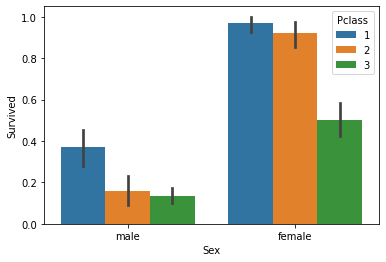

In [0]:
 sns.barplot(x="Sex",  y="Survived", 
 hue="Pclass", data=data)

In [0]:
#Información de la data. Nos percatamos que existen columnas como Age y Cabin que cuentan con data en blanco. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
#Procederemos a confirmar y ver la proporción de qué columnas tienen valores en blanco
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
#Ahora verificamos los estadísticos básicos de la data. Recordemos que pueden cambiar si decidimos rellenar
#los datos en blanco con un valor referencial
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
#Procederemos a reemplazar con el valor de la mediana
data['Age'] = data['Age'].fillna(data['Age'].median())

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


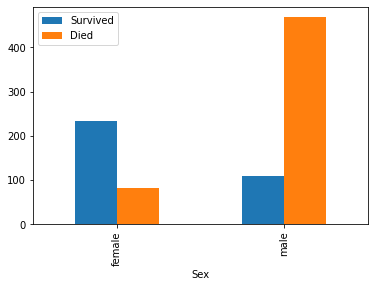

In [0]:
data['Died'] = 1 - data['Survived']

data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar')

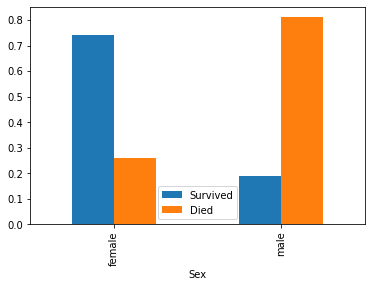

In [0]:
data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar')

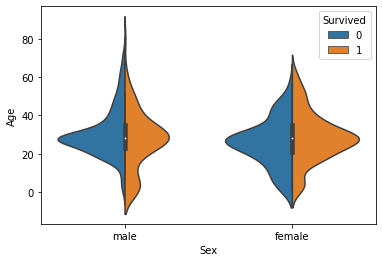

In [0]:
import seaborn as sns
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=data, 
               split=True     
              )